In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("medical_cost_insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


OBSERVATION LEVEL-1
6 COLUMNS INCLUDING AGE,SEX,BMI,CHILDREN,SMOKER,REGION ARE OUR FEATURES AND CHARGES IS OUR TARGET

male      676
female    662
Name: sex, dtype: int64


<AxesSubplot:xlabel='sex', ylabel='count'>

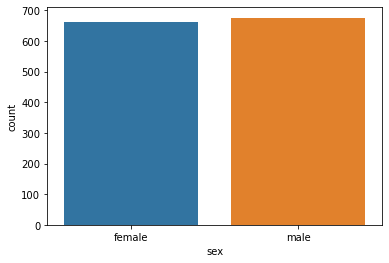

In [5]:
print(df['sex'].value_counts())
sns.countplot(df['sex'])

676 MALES AND 662 MALES HENCE ALMOST SAME NUMBER OF ROWS FOR BOTH THE CATEGORIES LEADING TO A BALANCED DATASET IN TERMS OF GENDER 

['southwest' 'southeast' 'northwest' 'northeast']


<AxesSubplot:xlabel='region', ylabel='count'>

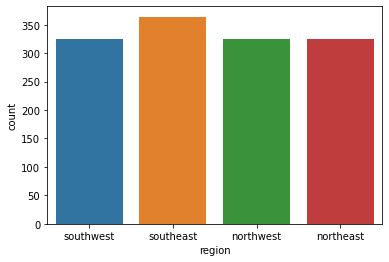

In [6]:
print(df['region'].unique())
sns.countplot(df['region'])

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


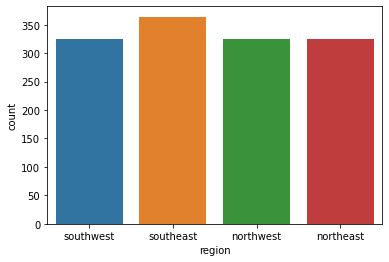

In [7]:
print(df['region'].value_counts())
sns.countplot(df['region'])
plt.show()

TOTAL 4 UNIQUE REGIONS SOUTHWEST,SOUTHEAST,NORTHWEST,NORTHEAST
AND THEIR COUNTS ARE 
southeast    364
southwest    325
northwest    325
northeast    324


no     1064
yes     274
Name: smoker, dtype: int64


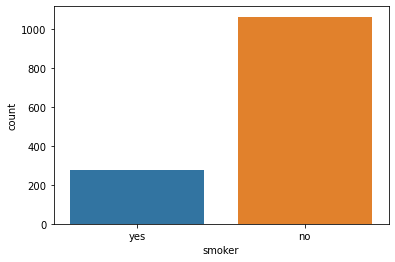

In [8]:
print(df['smoker'].value_counts())
sns.countplot(df['smoker'])
plt.show()

PEOPLE WHO ARE NON SMOKERS ARE MUCH MORE AS COMPARED TO SMOKERS -------------------------

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


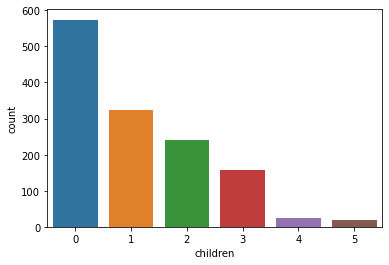

In [9]:
print(df['children'].value_counts())
sns.countplot(df['children'])
plt.show()

MARGINALLY LESS NUMBER OF ROWS ARE THERE IN THE DATASET FOR 4-5 CHILDRENS

CHECKING FOR THE NULLS

In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

DATASET LOOKS HEALTHY IN TERMS OF NULLS

DESCRIBING DATASET 

In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


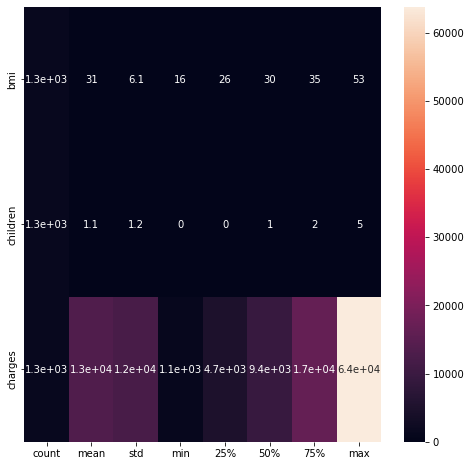

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(df.describe().T[1:],annot=True,annot_kws={'size':10})
plt.show()

CHECKING FOR THE CORRELATIONS BETWEEN THE FEATURES AND TARGET

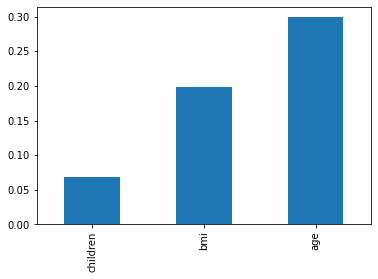

In [13]:
df.corr()['charges'].drop(['charges']).sort_values().plot(kind='bar')
plt.show()

AS WE CAN SEE AGE HAVE A VERY HIGHER CORRELATION WITH OUR TARGET AS COMAPRED TO BMI AND CHILDREN

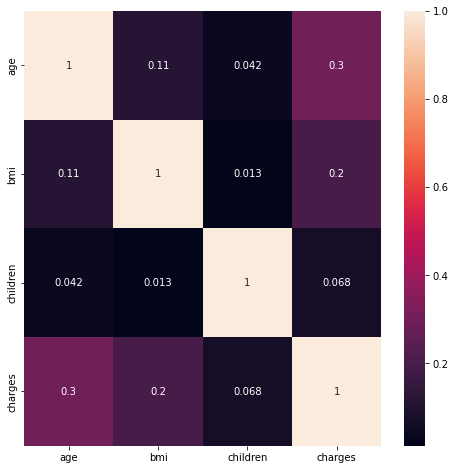

In [14]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,annot_kws={'size':10})
plt.show()

CHECKING FOR THE PLOTS BETWEEN FEATURE AND TARGET AND PLOTS FOR CHECKING THE DISTRIBUTION OF DATA

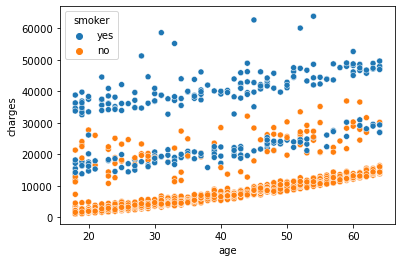

In [15]:
sns.scatterplot(x=df['age'],y=df['charges'],hue=df['smoker'])
plt.show()

AS WE CAN SEE NON SMOKERS ARE HAVING MUCH LOWER CHAREGS AS COMPARED TO SMOKERS AND THERE IS A PATTERN VISIBLE -AS AGE INCREASES CHARGES ALSO INCREASING

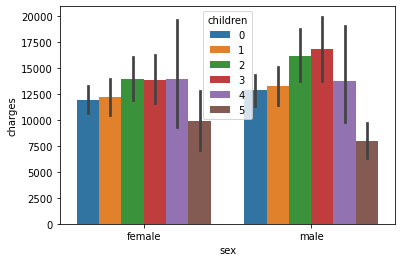

In [16]:
sns.barplot(x=df['sex'],y=df['charges'],hue=df['children'])
plt.show()

PEOPLE HAVING 2 CHILDREN ARE COMPARATIVELY CHARGED MORE AS COMPARED TO OTHERS AS PER OUR DATA

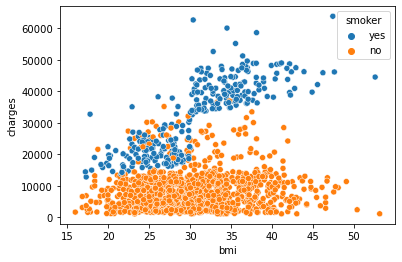

In [17]:
sns.scatterplot(x=df['bmi'],y=df['charges'],hue=df["smoker"])
plt.show()

WE CAN OBSERVE FROM THIS PLOT THAT MAXIMUM NUMBER OF SMOKERS ARE DENSED IN LOW BMI REGION AND ARE PAYING LESS CHARGES  AS COMPARED TO SMOKERS WHO ARE AT HIGHER BMIs


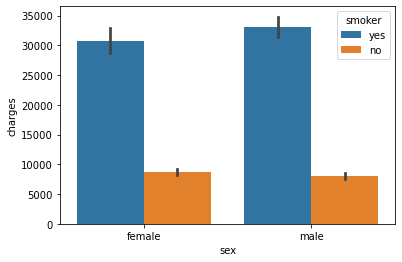

In [18]:
sns.barplot(x=df['sex'],y=df['charges'],hue=df['smoker'])
plt.show()

MALES ARE PAYING MORE CHARGES AS COMPARED TO FEMALES

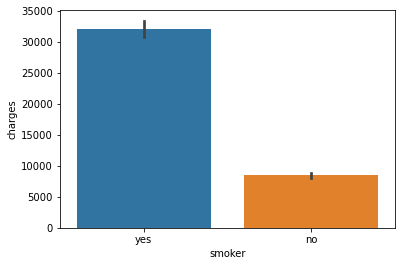

In [19]:
sns.barplot(x=df['smoker'],y=df['charges'])
plt.show()

SMOKERS ARE CHARGED EXCEPTIONALLY MORE THAN NON SMOKERS HENCE BEING A SMOKER AND A NON SMOKER WILL LEAD TO SIGNIFICANT DIIFERENCE IN CHARGES AT TIME OF PREDICTION

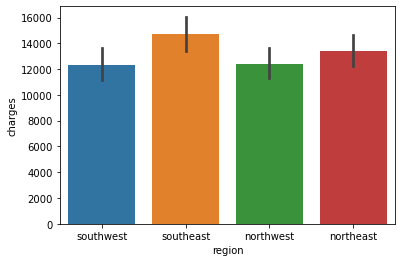

In [20]:
sns.barplot(x=df['region'],y=df['charges'])
plt.show()

PEOPLE IN SOUTHEAST ARE CHARGED MARGINALY MORE THAN NORTHEAST AND SIGNIFICANTLY MORE THAN NORTHWEST AND SOUTHWEST

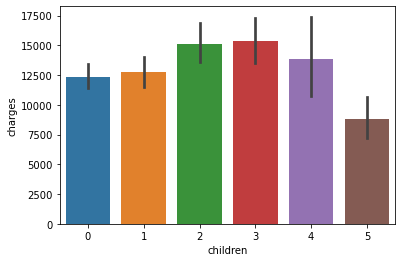

In [21]:
sns.barplot(x=df['children'],y=df['charges'])
plt.show()

AS CHILDREN INCREASES CAHRGES ALSO INCREASE UPTIL 3 AFTER THAT THERE IS A GRADUAL DECREASE IN CHARGES 
MAYBE LESS NUMBER OF RECORDS IN THAT CATEGORY MIGHT BE THE REASON


ENCODING THE CATEGORICAL COLUMNS SEX AND SMOKER USING GET DUMMIES

In [22]:
dt=pd.DataFrame(pd.get_dummies(df[['sex','smoker','region']]))

In [23]:
dt

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,0,1,1,0,0,1,0,0
1334,1,0,1,0,1,0,0,0
1335,1,0,1,0,0,0,1,0
1336,1,0,1,0,0,0,0,1


In [24]:
df=pd.concat([df,dt],axis=1)

In [25]:
df.head()

,age,sex,bmi,children,smoker,region,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,0,0,1,0,0


In [26]:
df.drop(['sex','smoker','region'],axis=1,inplace=True)

In [27]:
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


checking for the outliers in age and bmi

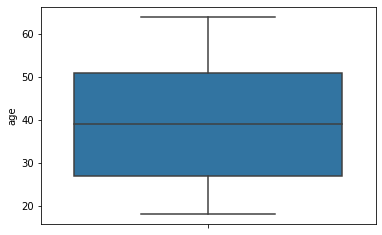

In [28]:
sns.boxplot(y=df['age'])
plt.ylabel('age')
plt.show()

NO OUTLIERS IN AGE FOUND

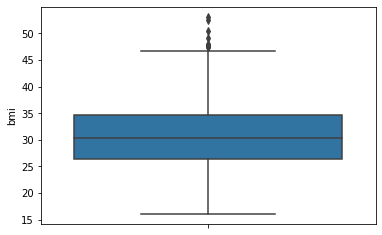

In [29]:
sns.boxplot(y=df['bmi'])
plt.ylabel('bmi')
plt.show()

FEW OUTLIERS IN BMI WE WILL TRY TO HANDLE THEM USING ZSCORE

In [30]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [31]:
df.shape

(1338, 12)

In [32]:
df=df[(z<3).all(axis=1)]

In [33]:
df.shape

(1309, 12)

CALCULATING THE LOSS IN DATA AFTER HANDLING THE OUTLIERS

In [34]:
loss=((1338-1309)/1338)*100

In [35]:
print(f"LOSS AFTER OUTLIER REMOVAL IS {round(loss,2)}% ")

LOSS AFTER OUTLIER REMOVAL IS 2.17% 


WHICH IS VERY LESS SO WE CAN CONTINUE WITH NEW DATASET AFTER REMOVAL

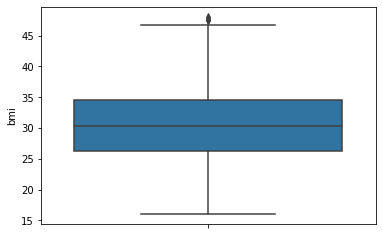

In [36]:
sns.boxplot(y=df['bmi'])
plt.ylabel('bmi')
plt.show()

SUCESSFULLY CONTROLLED THE OUTLIERS---------------

LETS CHECK THE DISTRIBUTION OF OUR CONTINUOUS FEATURES

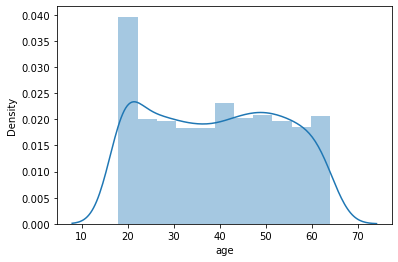

In [37]:
sns.distplot(df['age'])
plt.xlabel('age')
plt.show()

DATA IS SPREAD MUCH WIDELY

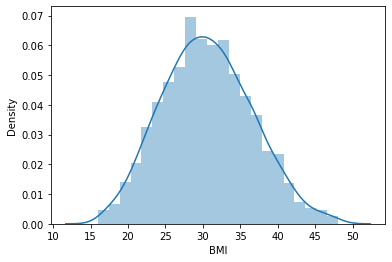

In [38]:
sns.distplot(df['bmi'])
plt.xlabel('BMI')
plt.show()

BMI IS DISTRIBUTED BEAUTIFULLY AROUND THE MEAN AND WITH A PERFECTLY SPREAD AS OBSERVED FROM THE GRAPH

<AxesSubplot:>

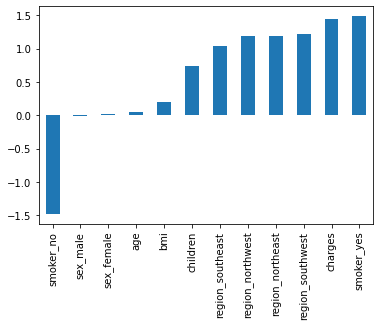

In [39]:
df.skew().sort_values().plot(kind='bar')

In [40]:
df.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [41]:
x=df.drop(['charges'],axis=1)

In [42]:
y=df['charges']

USING POWER TRANSFORMER FOR STANDARSIDATION OF OUR DATA 

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
pt=StandardScaler()

In [45]:
df_scaled=pd.DataFrame(pt.fit_transform(df),columns=df.columns)

In [46]:
x_scaled=df_scaled.drop(['charges'],axis=1)

In [47]:
y=df_scaled['charges']

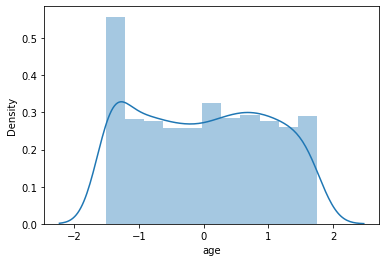

In [48]:
sns.distplot(x_scaled['age'])
plt.xlabel('age')
plt.show()

CHECKING FOR MULTICOLLINEARINTY USING VARIANCE INFLATION FACTOR

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
vif=pd.DataFrame()

In [51]:
vif['features']=x_scaled.columns

In [52]:
vif['scores']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

In [53]:
vif[:3]

,features,scores
0,age,1.020798
1,bmi,1.105513
2,children,1.008207


since values are much lower than the optimum value 5 there is hardly any multicollinearity issue here and we can proceed without dropping any columns

SPILIITING THE DATA INTO TRAIN AND TEST

In [54]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [55]:
for i in range (0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    lr_train_pred=lr.predict(x_train)
    lr_test_pred=lr.predict(x_test)
    lr_train_accuracy=r2_score(y_train,lr_train_pred)
    lr_test_accuracy=r2_score(y_test,lr_test_pred)
    if(round(lr_train_accuracy*100,1)==round(lr_test_accuracy*100,1)):
        print('\n\nAT RANDOM STATE--',i)
        print(f'\n\nTRAINING ACCURACY IS -{round((lr_train_accuracy)*100,2)}--AND TESTING ACCURACY IS {round((lr_test_accuracy)*100,2)}')
        



AT RANDOM STATE-- 126


TRAINING ACCURACY IS -75.23--AND TESTING ACCURACY IS 75.18


AT RANDOM STATE-- 198


TRAINING ACCURACY IS -75.27--AND TESTING ACCURACY IS 75.29


AT RANDOM STATE-- 286


TRAINING ACCURACY IS -75.25--AND TESTING ACCURACY IS 75.26


AT RANDOM STATE-- 326


TRAINING ACCURACY IS -75.25--AND TESTING ACCURACY IS 75.27


AT RANDOM STATE-- 404


TRAINING ACCURACY IS -75.29--AND TESTING ACCURACY IS 75.29


AT RANDOM STATE-- 664


TRAINING ACCURACY IS -75.29--AND TESTING ACCURACY IS 75.3


AT RANDOM STATE-- 764


TRAINING ACCURACY IS -75.29--AND TESTING ACCURACY IS 75.26


CHHOSING RANDOM STATE 404

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=404,test_size=0.20)

-----CHECKING THE OVER FITTING USING CROSS VAL SCORE---------------------

In [57]:
lr.fit(x_train,y_train)

LinearRegression()

In [58]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
def score(mod,x_train,x_test,y_train,y_test,train):
    n=x_train.shape[0]
    p=6
    if (train==True):
        mod.fit(x_train,y_train)
        y_pred=mod.predict(x_train)
        accuracy=r2_score(y_train,y_pred)
        mse=mean_squared_error(y_train,y_pred)
        mae=mean_absolute_error(y_train,y_pred)
        rsme=np.sqrt(mse)
        print(f"\n\nTraining SCORE FOR THE {mod} is {round(accuracy*100,2)}")
        print('\nmean sqaured error is --',mse)
        print('\nmean sqaured error is --',mse)
        print('\nroot mean sqaured error is --',rsme)
        print('\nmean aboslute error is --',mae)
        print('\ndifference between rmse and mae is ',rsme-mae)
    elif(train==False):
        mod.fit(x_train,y_train)
        y_pred=mod.predict(x_test)
        accuracy=r2_score(y_test,y_pred)
        cross_val=cross_val_score(mod,x_scaled,y,cv=4).mean()
        ad_r=1-(1-accuracy)*(n-1)/(n-p-1)
        mse=mean_squared_error(y_test,y_pred)
        mae=mean_absolute_error(y_test,y_pred)
        rsme=np.sqrt(mse)
        print(f"\n\nTesting SCORE FOR THE {mod} is {round(accuracy*100,2)}")
        print('\n\nCROSS VAL SCORE IS --',cross_val)
        print(f"\nadjusted r2_score for {mod} is {round(ad_r*100,2)}")
        print('\nmean sqaured error is --',mse)
        print('\nmean aboslute error is -',mae)
        print('\nroot mean sqaured error is --',rsme)
        print('\nmean aboslute error is --',mae)
        print('\ndifference between rmse and mae is ',rsme-mae)

In [59]:
score(lr,x_train,x_test,y_train,y_test,train=True)
score(lr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE LinearRegression() is 75.29

mean sqaured error is -- 0.24764407078923525

mean sqaured error is -- 0.24764407078923525

root mean sqaured error is -- 0.49763849407902044

mean aboslute error is -- 0.3474353932795461

difference between rmse and mae is  0.15020310079947435


Testing SCORE FOR THE LinearRegression() is 75.29


CROSS VAL SCORE IS -- 0.7458874471214254

adjusted r2_score for LinearRegression() is 75.15

mean sqaured error is -- 0.24484943579788984

mean aboslute error is - 0.36098114274567206

root mean sqaured error is -- 0.49482263064444604

mean aboslute error is -- 0.36098114274567206

difference between rmse and mae is  0.13384148789877398


MODEL 2)-DECISION TREE
----------------------

In [60]:
from sklearn.tree import DecisionTreeRegressor

In [61]:
dt=DecisionTreeRegressor()

In [62]:
score(dt,x_train,x_test,y_train,y_test,train=True)
score(dt,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE DecisionTreeRegressor() is 99.95

mean sqaured error is -- 0.0005420746571114759

mean sqaured error is -- 0.0005420746571114759

root mean sqaured error is -- 0.02328249679719673

mean aboslute error is -- 0.001017586200513548

difference between rmse and mae is  0.02226491059668318


Testing SCORE FOR THE DecisionTreeRegressor() is 72.33


CROSS VAL SCORE IS -- 0.6897117612229735

adjusted r2_score for DecisionTreeRegressor() is 72.17

mean sqaured error is -- 0.27414231822421425

mean aboslute error is - 0.2476060481620536

root mean sqaured error is -- 0.5235860179800587

mean aboslute error is -- 0.2476060481620536

difference between rmse and mae is  0.2759799698180051


------------------HYPERTUING THE PARAMETERS-------------

In [63]:
param={'criterion':["squared_error", "friedman_mse", "absolute_error"],
      'splitter':["best", "random"],
      'min_samples_split':np.arange(2,5),
      'random_state':[404,350,234,210,198]}

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
lgs=GridSearchCV(dt,param_grid=param)

In [66]:
lgs.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'min_samples_split': array([2, 3, 4]),
                         'random_state': [404, 350, 234, 210, 198],
                         'splitter': ['best', 'random']})

In [67]:
lgs.best_params_

{'criterion': 'squared_error',
 'min_samples_split': 4,
 'random_state': 210,
 'splitter': 'random'}

In [68]:
dt=DecisionTreeRegressor(criterion='squared_error',min_samples_split=4,random_state=210,splitter='random')

In [69]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(min_samples_split=4, random_state=210, splitter='random')

In [70]:
score(dt,x_train,x_test,y_train,y_test,train=True)
score(dt,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE DecisionTreeRegressor(min_samples_split=4, random_state=210, splitter='random') is 95.64

mean sqaured error is -- 0.04366224723785679

mean sqaured error is -- 0.04366224723785679

root mean sqaured error is -- 0.20895513211657854

mean aboslute error is -- 0.07842913549845144

difference between rmse and mae is  0.13052599661812708


Testing SCORE FOR THE DecisionTreeRegressor(min_samples_split=4, random_state=210, splitter='random') is 79.01


CROSS VAL SCORE IS -- 0.7167479345632357

adjusted r2_score for DecisionTreeRegressor(min_samples_split=4, random_state=210, splitter='random') is 78.89

mean sqaured error is -- 0.20794533154537842

mean aboslute error is - 0.21809692009372444

root mean sqaured error is -- 0.45601023184285944

mean aboslute error is -- 0.21809692009372444

difference between rmse and mae is  0.237913311749135


AGAIN TUNING THE PARAMETERS:
    

In [71]:
dt=DecisionTreeRegressor()

In [72]:
pp={'criterion':["squared_error", "friedman_mse", "absolute_error"],
      'splitter':["best", "random"],
      'min_samples_split':np.arange(4,7),
    
      'random_state':[404,350,234,210,198],
    'max_depth':np.arange(20,25)}
                                    

In [73]:
lgp=GridSearchCV(dt,param_grid=pp)

In [74]:
lgp.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': array([20, 21, 22, 23, 24]),
                         'min_samples_split': array([4, 5, 6]),
                         'random_state': [404, 350, 234, 210, 198],
                         'splitter': ['best', 'random']})

In [75]:
lgp.best_params_

{'criterion': 'squared_error',
 'max_depth': 20,
 'min_samples_split': 6,
 'random_state': 210,
 'splitter': 'random'}

In [76]:
dt=lgp.best_estimator_

In [77]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=20, min_samples_split=6, random_state=210,
                      splitter='random')

In [78]:
score(dt,x_train,x_test,y_train,y_test,train=True)
score(dt,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE DecisionTreeRegressor(max_depth=20, min_samples_split=6, random_state=210,
                      splitter='random') is 93.21

mean sqaured error is -- 0.068063708684634

mean sqaured error is -- 0.068063708684634

root mean sqaured error is -- 0.26089022343628365

mean aboslute error is -- 0.12254337630909762

difference between rmse and mae is  0.13834684712718603


Testing SCORE FOR THE DecisionTreeRegressor(max_depth=20, min_samples_split=6, random_state=210,
                      splitter='random') is 82.38


CROSS VAL SCORE IS -- 0.7817812492543875

adjusted r2_score for DecisionTreeRegressor(max_depth=20, min_samples_split=6, random_state=210,
                      splitter='random') is 82.28

mean sqaured error is -- 0.17456844055485557

mean aboslute error is - 0.2188514855359163

root mean sqaured error is -- 0.4178138826736799

mean aboslute error is -- 0.2188514855359163

difference between rmse and mae is  0.19896239713776362


AGAIN TUNING THE PARAMETERS:

In [79]:
dt=DecisionTreeRegressor()

In [80]:
ppo={'criterion':["squared_error", "friedman_mse", "absolute_error"],
      'splitter':["best", "random"],
      'min_samples_split':np.arange(2,5),
    'min_samples_leaf':np.arange(3,6),
    'random_state':[404,350,234,210,198],
    'max_depth':np.arange(28,32)}
                           

In [81]:
lgt=GridSearchCV(dt,param_grid=ppo)

In [82]:
lgt.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': array([28, 29, 30, 31]),
                         'min_samples_leaf': array([3, 4, 5]),
                         'min_samples_split': array([2, 3, 4]),
                         'random_state': [404, 350, 234, 210, 198],
                         'splitter': ['best', 'random']})

In [83]:
lgt.best_params_

{'criterion': 'absolute_error',
 'max_depth': 28,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'random_state': 210,
 'splitter': 'random'}

In [84]:
dt=lgt.best_estimator_

In [85]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=28,
                      min_samples_leaf=4, random_state=210, splitter='random')

In [86]:
score(dt,x_train,x_test,y_train,y_test,train=True)
score(dt,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE DecisionTreeRegressor(criterion='absolute_error', max_depth=28,
                      min_samples_leaf=4, random_state=210, splitter='random') is 86.23

mean sqaured error is -- 0.1379283788533897

mean sqaured error is -- 0.1379283788533897

root mean sqaured error is -- 0.37138710108644013

mean aboslute error is -- 0.1313246960564449

difference between rmse and mae is  0.24006240502999524


Testing SCORE FOR THE DecisionTreeRegressor(criterion='absolute_error', max_depth=28,
                      min_samples_leaf=4, random_state=210, splitter='random') is 86.32


CROSS VAL SCORE IS -- 0.8293608366558658

adjusted r2_score for DecisionTreeRegressor(criterion='absolute_error', max_depth=28,
                      min_samples_leaf=4, random_state=210, splitter='random') is 86.24

mean sqaured error is -- 0.13558270148735704

mean aboslute error is - 0.14590436711680266

root mean sqaured error is -- 0.36821556388528315

mean aboslute error is -- 0.1459043671168

AS WE CAN SEE THERE IS A SIGNIFICANT AMOUNT OF INCREASE IN BOTH TRAINING ,TESTING AND CROSS VAL SCORES AND DIFFERNCE BETWEEN CROSS VAL SCORE AND MAE AND MSE HAVE ALSO DROPPED SIGNIFICANTLY SO WE WE WILL CONTINUE WITH THESE PARAMETRS AS OUR FINAL

MODEL 3) KNN 
---------------------------------

In [87]:
from sklearn.neighbors import KNeighborsRegressor

In [88]:
knr=KNeighborsRegressor()

In [89]:
knr.fit(x_train,y_train)

KNeighborsRegressor()

In [90]:
score(knr,x_train,x_test,y_train,y_test,train=True)
score(knr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE KNeighborsRegressor() is 85.57

mean sqaured error is -- 0.1445480074748102

mean sqaured error is -- 0.1445480074748102

root mean sqaured error is -- 0.38019469679995566

mean aboslute error is -- 0.23175075282186852

difference between rmse and mae is  0.14844394397808713


Testing SCORE FOR THE KNeighborsRegressor() is 79.92


CROSS VAL SCORE IS -- 0.7795267037403737

adjusted r2_score for KNeighborsRegressor() is 79.8

mean sqaured error is -- 0.1989626342933944

mean aboslute error is - 0.2801964958386552

root mean sqaured error is -- 0.44605227753414106

mean aboslute error is -- 0.2801964958386552

difference between rmse and mae is  0.16585578169548587


HYPERPARAMETER TUNING THE PARAMETERS:
    

In [91]:
knr.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [92]:
pl={"n_neighbors":np.arange(3,6),
   "weights":['uniform', 'distance'],
   "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':np.arange(25,35)}

In [93]:
kgs=GridSearchCV(knr,param_grid=pl)

In [94]:
kgs.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34]),
                         'n_neighbors': array([3, 4, 5]),
                         'weights': ['uniform', 'distance']})

In [95]:
kgs.best_params_

{'algorithm': 'auto', 'leaf_size': 25, 'n_neighbors': 5, 'weights': 'distance'}

In [96]:
knr=kgs.best_estimator_

In [97]:
knr.fit(x_train,y_train)

KNeighborsRegressor(leaf_size=25, weights='distance')

In [98]:
score(knr,x_train,x_test,y_train,y_test,train=True)
score(knr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE KNeighborsRegressor(leaf_size=25, weights='distance') is 99.95

mean sqaured error is -- 0.0005420746571114759

mean sqaured error is -- 0.0005420746571114759

root mean sqaured error is -- 0.02328249679719673

mean aboslute error is -- 0.001017586200513548

difference between rmse and mae is  0.02226491059668318


Testing SCORE FOR THE KNeighborsRegressor(leaf_size=25, weights='distance') is 80.76


CROSS VAL SCORE IS -- 0.7800359596861659

adjusted r2_score for KNeighborsRegressor(leaf_size=25, weights='distance') is 80.65

mean sqaured error is -- 0.19059199143527736

mean aboslute error is - 0.26446994194926987

root mean sqaured error is -- 0.43656842697941106

mean aboslute error is -- 0.26446994194926987

difference between rmse and mae is  0.1720984850301412


AGAIN TUNING THE PARAMETERS------------------------

In [99]:
knr=KNeighborsRegressor()

In [100]:
pu={"n_neighbors":np.arange(2,5),
   "weights":['uniform', 'distance'],
   "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':np.arange(40,50)}

In [101]:
kgsv=GridSearchCV(knr,param_grid=pu)

In [102]:
kgsv.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'n_neighbors': array([2, 3, 4]),
                         'weights': ['uniform', 'distance']})

In [103]:
kgs.best_params_

{'algorithm': 'auto', 'leaf_size': 25, 'n_neighbors': 5, 'weights': 'distance'}

In [104]:
knr=kgs.best_estimator_

In [105]:
score(knr,x_train,x_test,y_train,y_test,train=True)
score(knr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE KNeighborsRegressor(leaf_size=25, weights='distance') is 99.95

mean sqaured error is -- 0.0005420746571114759

mean sqaured error is -- 0.0005420746571114759

root mean sqaured error is -- 0.02328249679719673

mean aboslute error is -- 0.001017586200513548

difference between rmse and mae is  0.02226491059668318


Testing SCORE FOR THE KNeighborsRegressor(leaf_size=25, weights='distance') is 80.76


CROSS VAL SCORE IS -- 0.7800359596861659

adjusted r2_score for KNeighborsRegressor(leaf_size=25, weights='distance') is 80.65

mean sqaured error is -- 0.19059199143527736

mean aboslute error is - 0.26446994194926987

root mean sqaured error is -- 0.43656842697941106

mean aboslute error is -- 0.26446994194926987

difference between rmse and mae is  0.1720984850301412


MODEL 4) ADABOOST REGRESSOR
------------------------


In [106]:
from sklearn.ensemble import AdaBoostRegressor

In [107]:
adr=AdaBoostRegressor()

In [108]:
adr.fit(x_train,y_train)

AdaBoostRegressor()

In [109]:
score(adr,x_train,x_test,y_train,y_test,train=True)
score(adr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE AdaBoostRegressor() is 83.28

mean sqaured error is -- 0.1675274283083013

mean sqaured error is -- 0.1675274283083013

root mean sqaured error is -- 0.4093011462337985

mean aboslute error is -- 0.31839388560346044

difference between rmse and mae is  0.09090726063033805


Testing SCORE FOR THE AdaBoostRegressor() is 81.67


CROSS VAL SCORE IS -- 0.818349154443425

adjusted r2_score for AdaBoostRegressor() is 81.56

mean sqaured error is -- 0.18163336936466784

mean aboslute error is - 0.33881606058709984

root mean sqaured error is -- 0.426184665801889

mean aboslute error is -- 0.33881606058709984

difference between rmse and mae is  0.08736860521478917


ACCURACIES ARE QUIET HIGH AND MAIN THING IS DIFFERENCE BETWEEN RMSE AND MAE IS SO LOW WHICH MEANS VARIANCE IS LOW WHICH IS A GOOD THING AND IS TO BE CONSIDERED 


HYPERPARAMETER TUNING----------------

In [110]:
adr.get_params().keys()

dict_keys(['base_estimator', 'learning_rate', 'loss', 'n_estimators', 'random_state'])

In [111]:
para={
     'n_estimators':[48,52,60,72],
     'learning_rate':[0.001,0.025,0.03],
     'random_state':[232,345,678]}


In [112]:
ags=GridSearchCV(adr,param_grid=para)

In [113]:
ags.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.001, 0.025, 0.03],
                         'n_estimators': [48, 52, 60, 72],
                         'random_state': [232, 345, 678]})

In [114]:
ags.best_params_

{'learning_rate': 0.001, 'n_estimators': 48, 'random_state': 678}

In [115]:
adr=ags.best_estimator_

In [116]:
score(adr,x_train,x_test,y_train,y_test,train=True)
score(adr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE AdaBoostRegressor(learning_rate=0.001, n_estimators=48, random_state=678) is 85.79

mean sqaured error is -- 0.14233756747172752

mean sqaured error is -- 0.14233756747172752

root mean sqaured error is -- 0.3772765132786926

mean aboslute error is -- 0.21956904096970548

difference between rmse and mae is  0.15770747230898713


Testing SCORE FOR THE AdaBoostRegressor(learning_rate=0.001, n_estimators=48, random_state=678) is 86.33


CROSS VAL SCORE IS -- 0.8428641644492507

adjusted r2_score for AdaBoostRegressor(learning_rate=0.001, n_estimators=48, random_state=678) is 86.25

mean sqaured error is -- 0.13542816612611824

mean aboslute error is - 0.21812495559676381

root mean sqaured error is -- 0.36800566045390964

mean aboslute error is -- 0.21812495559676381

difference between rmse and mae is  0.14988070485714583


INCRESE IN ALL THE ACCURACIES WITH LOWERED DIFFERENCE BETWEEN CROSS VAL AND TESTING ACCURACY AND DIFFERENCE BETWEEN RMSE AND MAE IS ALSO MARGINAL AND CAN BE CONSIDERED A GOOD ONE

AGAIN TUNING THE PARAMETERS

In [117]:
adr=AdaBoostRegressor()

In [118]:
pa={
     'n_estimators':[55,52,60,72,68,70],
     'learning_rate':[0.001,0.025,0.03,0.0030,0.18,0.40],
     'random_state':[232,345,678]}

In [119]:
agv=GridSearchCV(adr,param_grid=pa)

In [120]:
agv.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.001, 0.025, 0.03, 0.003, 0.18,
                                           0.4],
                         'n_estimators': [55, 52, 60, 72, 68, 70],
                         'random_state': [232, 345, 678]})

In [121]:
agv.best_params_

{'learning_rate': 0.001, 'n_estimators': 60, 'random_state': 678}

In [122]:
adr=agv.best_estimator_

In [123]:
adr.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.001, n_estimators=60, random_state=678)

In [124]:
score(adr,x_train,x_test,y_train,y_test,train=True)
score(adr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE AdaBoostRegressor(learning_rate=0.001, n_estimators=60, random_state=678) is 85.88

mean sqaured error is -- 0.14148879496955796

mean sqaured error is -- 0.14148879496955796

root mean sqaured error is -- 0.3761499634049669

mean aboslute error is -- 0.22137941074007741

difference between rmse and mae is  0.1547705526648895


Testing SCORE FOR THE AdaBoostRegressor(learning_rate=0.001, n_estimators=60, random_state=678) is 86.33


CROSS VAL SCORE IS -- 0.842499673140725

adjusted r2_score for AdaBoostRegressor(learning_rate=0.001, n_estimators=60, random_state=678) is 86.25

mean sqaured error is -- 0.13548824604898188

mean aboslute error is - 0.2201404819176317

root mean sqaured error is -- 0.3680872804770383

mean aboslute error is -- 0.2201404819176317

difference between rmse and mae is  0.14794679855940662


ALMOST SAME RESULTS SO WE CAN CONTINUE WITH THESE LAST PARAMETERS 

MODEL 5)-RANDOM FOREST REGRESSOR

In [125]:
from sklearn.ensemble import RandomForestRegressor

In [126]:
rfr=RandomForestRegressor()

In [127]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [128]:
score(rfr,x_train,x_test,y_train,y_test,train=True)
score(rfr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE RandomForestRegressor() is 97.68

mean sqaured error is -- 0.023258138658013388

mean sqaured error is -- 0.023258138658013388

root mean sqaured error is -- 0.15250619219563968

mean aboslute error is -- 0.08294421523894985

difference between rmse and mae is  0.06956197695668984


Testing SCORE FOR THE RandomForestRegressor() is 85.34


CROSS VAL SCORE IS -- 0.829363165095766

adjusted r2_score for RandomForestRegressor() is 85.26

mean sqaured error is -- 0.14524395948770727

mean aboslute error is - 0.20997206738164184

root mean sqaured error is -- 0.38110885516831966

mean aboslute error is -- 0.20997206738164184

difference between rmse and mae is  0.17113678778667782


HYPERPARAMETER TUNING

In [129]:
rfr=RandomForestRegressor()

In [130]:
par={"n_estimators":[60,72,82],
     "criterion":["squared_error", "absolute_error", "poisson"],
     "max_depth":[25,28,30],
     "min_samples_split":[2,3,5]}

In [131]:
rgs=GridSearchCV(rfr,param_grid=par)

In [132]:
rgs.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [25, 28, 30],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [60, 72, 82]})

In [133]:
rgs.best_params_

{'criterion': 'squared_error',
 'max_depth': 28,
 'min_samples_split': 5,
 'n_estimators': 72}

In [134]:
rfr=rgs.best_estimator_

In [135]:
score(rfr,x_train,x_test,y_train,y_test,train=True)
score(rfr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE RandomForestRegressor(max_depth=28, min_samples_split=5, n_estimators=72) is 95.32

mean sqaured error is -- 0.04694058315186136

mean sqaured error is -- 0.04694058315186136

root mean sqaured error is -- 0.21665775580823632

mean aboslute error is -- 0.11755483200125802

difference between rmse and mae is  0.0991029238069783


Testing SCORE FOR THE RandomForestRegressor(max_depth=28, min_samples_split=5, n_estimators=72) is 85.59


CROSS VAL SCORE IS -- 0.8351185551799243

adjusted r2_score for RandomForestRegressor(max_depth=28, min_samples_split=5, n_estimators=72) is 85.51

mean sqaured error is -- 0.14276049155974369

mean aboslute error is - 0.2098405190709219

root mean sqaured error is -- 0.3778365937276903

mean aboslute error is -- 0.2098405190709219

difference between rmse and mae is  0.16799607465676838


MODEL 5)SVR
-----------------------

In [136]:
from sklearn.svm import SVR

In [137]:
svr=SVR()

In [138]:
svr.fit(x_train,y_train)

SVR()

In [139]:
score(svr,x_train,x_test,y_train,y_test,train=True)
score(svr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE SVR() is 85.21

mean sqaured error is -- 0.14817782826485495

mean sqaured error is -- 0.14817782826485495

root mean sqaured error is -- 0.38493873313146204

mean aboslute error is -- 0.2011448112757252

difference between rmse and mae is  0.18379392185573684


Testing SCORE FOR THE SVR() is 85.75


CROSS VAL SCORE IS -- 0.8350259492314207

adjusted r2_score for SVR() is 85.66

mean sqaured error is -- 0.14123324994196668

mean aboslute error is - 0.20441435659733556

root mean sqaured error is -- 0.37581012485291915

mean aboslute error is -- 0.20441435659733556

difference between rmse and mae is  0.17139576825558359


QUIET HIGH ACCURACIES SCORE AND LOW DIFFERENCE BETWEEN RSME AND MAE

HYPERPARAMETER TUNING

In [140]:
parm={"epsilon":[0.1,0.2,0.3],
      "shrinking":[True,False],
      "gamma":['scale', 'auto']}

In [141]:
sgs=GridSearchCV(svr,param_grid=parm)

In [142]:
sgs.fit(x_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'epsilon': [0.1, 0.2, 0.3], 'gamma': ['scale', 'auto'],
                         'shrinking': [True, False]})

In [143]:
sgs.best_params_

{'epsilon': 0.2, 'gamma': 'scale', 'shrinking': True}

In [144]:
svr=sgs.best_estimator_

In [145]:
svr.fit(x_train,y_train)

SVR(epsilon=0.2)

In [146]:
score(svr,x_train,x_test,y_train,y_test,train=True)
score(svr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE SVR(epsilon=0.2) is 84.93

mean sqaured error is -- 0.15102922249516557

mean sqaured error is -- 0.15102922249516557

root mean sqaured error is -- 0.3886247836862255

mean aboslute error is -- 0.26907084992318386

difference between rmse and mae is  0.11955393376304163


Testing SCORE FOR THE SVR(epsilon=0.2) is 85.46


CROSS VAL SCORE IS -- 0.8322932231148538

adjusted r2_score for SVR(epsilon=0.2) is 85.37

mean sqaured error is -- 0.14409288262969364

mean aboslute error is - 0.27004089104601187

root mean sqaured error is -- 0.37959568310202585

mean aboslute error is -- 0.27004089104601187

difference between rmse and mae is  0.10955479205601398


RETUNING THE PARAMETERS---------

In [147]:
svr=SVR()

In [148]:
parm={"epsilon":np.arange(0.001,0.1,0.01),
      "shrinking":[True,False],
      "gamma":['scale', 'auto'],
     "degree":[2,3,4],
     "verbose":[True,False]}

In [149]:
sgs=GridSearchCV(svr,param_grid=parm)

In [150]:
sgs.fit(x_train,y_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

GridSearchCV(estimator=SVR(),
             param_grid={'degree': [2, 3, 4],
                         'epsilon': array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
                         'gamma': ['scale', 'auto'], 'shrinking': [True, False],
                         'verbose': [True, False]})

In [151]:
sgs.best_params_

{'degree': 2,
 'epsilon': 0.09099999999999998,
 'gamma': 'scale',
 'shrinking': True,
 'verbose': True}

In [152]:
svr=sgs.best_estimator_

In [153]:
svr.fit(x_train,y_train)

[LibSVM]

SVR(degree=2, epsilon=0.09099999999999998, verbose=True)

In [154]:
score(svr,x_train,x_test,y_train,y_test,train=True)
score(svr,x_train,x_test,y_train,y_test,train=False)

[LibSVM]

Training SCORE FOR THE SVR(degree=2, epsilon=0.09099999999999998, verbose=True) is 85.16

mean sqaured error is -- 0.14872175795847078

mean sqaured error is -- 0.14872175795847078

root mean sqaured error is -- 0.3856446005825451

mean aboslute error is -- 0.1950027718714487

difference between rmse and mae is  0.19064182871109642
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

Testing SCORE FOR THE SVR(degree=2, epsilon=0.09099999999999998, verbose=True) is 85.69


CROSS VAL SCORE IS -- 0.8343580362227384

adjusted r2_score for SVR(degree=2, epsilon=0.09099999999999998, verbose=True) is 85.61

mean sqaured error is -- 0.14177345278216813

mean aboslute error is - 0.19858257428689866

root mean sqaured error is -- 0.37652815669238887

mean aboslute error is -- 0.19858257428689866

difference between rmse and mae is  0.17794558240549022


SINCE HYPER PARAMETER TUNING AINT MAKING MUCH DIFFERENCE WE WILL GO WITH DEFAULT PARAMETERS

In [155]:
svr=SVR()

In [156]:
svr.fit(x_train,y_train)

SVR()

In [157]:
score(svr,x_train,x_test,y_train,y_test,train=True)
score(svr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE SVR() is 85.21

mean sqaured error is -- 0.14817782826485495

mean sqaured error is -- 0.14817782826485495

root mean sqaured error is -- 0.38493873313146204

mean aboslute error is -- 0.2011448112757252

difference between rmse and mae is  0.18379392185573684


Testing SCORE FOR THE SVR() is 85.75


CROSS VAL SCORE IS -- 0.8350259492314207

adjusted r2_score for SVR() is 85.66

mean sqaured error is -- 0.14123324994196668

mean aboslute error is - 0.20441435659733556

root mean sqaured error is -- 0.37581012485291915

mean aboslute error is -- 0.20441435659733556

difference between rmse and mae is  0.17139576825558359


------------------ADJUSTED R2_SCORE CALCULATION----------------------------------------

In [158]:
n=x_train.shape[0]
p=6
acc=lr_test_accuracy
def adj_score(n,p,acc):
    ad_r=1-(1-acc)*(n-1)/(n-p-1)
    print('ADJUSTED R2 SCORE IS ----',round(ad_r*100,2))
adj_score(n,p,acc)    

ADJUSTED R2 SCORE IS ---- 73.59


CONSLUSION-
SINCE ADABOOST REGRESSOR AFTER HYPERPARAMETER TUNING IS GIVING VERY HIGH VALUES FOR BOTH TRAINING AND TESTING ALSO DIFFERNCE BETWEEN CROSS VAL SCORE AND ACCURACY SCORE ARE MUCH LOWER AS COMPARED TO OTHER MODEL ,SAME WITH THE DIFFERENCE BETWEEN RSME AND MAE WE WILL GO WITH ADABOOST REGRESSOR AS AOUR FINAL MODEL..........

In [159]:
score(adr,x_train,x_test,y_train,y_test,train=True)
score(adr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE AdaBoostRegressor(learning_rate=0.001, n_estimators=60, random_state=678) is 85.88

mean sqaured error is -- 0.14148879496955796

mean sqaured error is -- 0.14148879496955796

root mean sqaured error is -- 0.3761499634049669

mean aboslute error is -- 0.22137941074007741

difference between rmse and mae is  0.1547705526648895


Testing SCORE FOR THE AdaBoostRegressor(learning_rate=0.001, n_estimators=60, random_state=678) is 86.33


CROSS VAL SCORE IS -- 0.842499673140725

adjusted r2_score for AdaBoostRegressor(learning_rate=0.001, n_estimators=60, random_state=678) is 86.25

mean sqaured error is -- 0.13548824604898188

mean aboslute error is - 0.2201404819176317

root mean sqaured error is -- 0.3680872804770383

mean aboslute error is -- 0.2201404819176317

difference between rmse and mae is  0.14794679855940662


SAVING THE MODEL-
----------------------


In [161]:
import pickle

In [162]:
with open('adr_model_pkl', 'wb') as files:
    pickle.dump(adr, files)

loading the model
----------------------


In [163]:
with open('adr_model_pkl' , 'rb') as f:
    adb = pickle.load(f)

In [164]:
score(adb,x_train,x_test,y_train,y_test,train=True)
score(adb,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE AdaBoostRegressor(learning_rate=0.001, n_estimators=60, random_state=678) is 85.88

mean sqaured error is -- 0.14148879496955796

mean sqaured error is -- 0.14148879496955796

root mean sqaured error is -- 0.3761499634049669

mean aboslute error is -- 0.22137941074007741

difference between rmse and mae is  0.1547705526648895


Testing SCORE FOR THE AdaBoostRegressor(learning_rate=0.001, n_estimators=60, random_state=678) is 86.33


CROSS VAL SCORE IS -- 0.842499673140725

adjusted r2_score for AdaBoostRegressor(learning_rate=0.001, n_estimators=60, random_state=678) is 86.25

mean sqaured error is -- 0.13548824604898188

mean aboslute error is - 0.2201404819176317

root mean sqaured error is -- 0.3680872804770383

mean aboslute error is -- 0.2201404819176317

difference between rmse and mae is  0.14794679855940662
